In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [2]:
df = pd.read_excel('Mego.travel_task.xlsx', sheet_name='Тесты')
df

,Заказ,Стоимость заказа,Статус,Тип устройства,Профит,Тест
0,1,5360.0,Оплачен,mobile,NaN,исходные показатели
1,2,12760.0,Оплачен,mobile,NaN,исходные показатели
2,3,27378.0,Оплачен,mobile,299.0,исходные показатели
3,4,11056.0,Оплачен,mobile,NaN,исходные показатели
4,5,9160.0,Оплачен,mobile,NaN,исходные показатели
...,...,...,...,...,...,...
41686,41687,16627.0,Не оплачен,mobile,NaN,15
41687,41688,23710.0,Оплачен,desktop,NaN,15
41688,41689,8879.0,Оплачен,desktop,299.0,15
41689,41690,32940.0,Забронирован,desktop,480.0,15


Была проведена серия тестов по  различному оформлению продукта. В поле Профит записан доход от продажи продукта. Сессии  с позитивным  результатом имеют статус Оплачен, с негативным результатом  - Ошибка и Не оплачен.  Основным показателем доходности принимаем ARPPU (ARPPU=Доход/Количество заказов).





### Задание 1

#### Почистить данные (подсказка: проблема имеет один и тот же тип).

Посмотрим на данные в таблице и на пропуски данных. Затем заменим пропуски в ст. "Профит" нулями для дальнейшей работы. Проведем унификацию данных в ст. "Статус", удалим строки с вариантом "Забронирован".

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41691 entries, 0 to 41690
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Заказ               41691 non-null  int64  
 1   Стоимость  заказа   41691 non-null  float64
 2   Статус              41691 non-null  object 
 3   Тип устройства      41477 non-null  object 
 4   Профит              4350 non-null   float64
 5   Тест                41691 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 1.9+ MB


In [4]:
df['Профит'].fillna(0, inplace=True)

In [5]:
status_codes = {'Оплачен': 'Положит. результат', 'Ошибка': 'Отриц. результат', 'Не оплачен': 'Отриц. результат'}

df['Статус'] = df['Статус'].map( status_codes )
df.dropna(subset=['Статус'], inplace=True)

In [6]:
df

,Заказ,Стоимость заказа,Статус,Тип устройства,Профит,Тест
0,1,5360.0,Положит. результат,mobile,0.0,исходные показатели
1,2,12760.0,Положит. результат,mobile,0.0,исходные показатели
2,3,27378.0,Положит. результат,mobile,299.0,исходные показатели
3,4,11056.0,Положит. результат,mobile,0.0,исходные показатели
4,5,9160.0,Положит. результат,mobile,0.0,исходные показатели
...,...,...,...,...,...,...
41685,41686,7433.0,Положит. результат,desktop,216.0,15
41686,41687,16627.0,Отриц. результат,mobile,0.0,15
41687,41688,23710.0,Положит. результат,desktop,0.0,15
41688,41689,8879.0,Положит. результат,desktop,299.0,15


### Задание 2

#### Посчитать долю негативных и позитивных результатов по каждому тесту, составить рейтинг позитивности тестов.

In [7]:
df_2 = df.groupby(['Тест', 'Статус']).agg( {'Статус': 'count'} )
df_2.columns = ['Кол-во']
df_2 = df_2.reset_index().pivot(index='Тест', columns='Статус', values='Кол-во')

In [8]:
df_2['Сумма'] = df_2['Отриц. результат'] + df_2['Положит. результат']

df_2['Отриц. результат'] = df_2['Отриц. результат'] / df_2['Сумма']
df_2['Положит. результат'] = df_2['Положит. результат'] / df_2['Сумма']
df_2.drop(columns=['Сумма'], inplace=True)
df_2 = df_2.sort_values('Положит. результат', ascending=False)
print('Рейтинг позитивности тестов')
df_2

Рейтинг позитивности тестов


Статус,Отриц. результат,Положит. результат
Тест,,
6,0.184173,0.815827
15,0.185694,0.814306
2,0.189105,0.810895
14,0.193318,0.806682
12,0.203964,0.796036
5,0.210680,0.789320
7,0.212054,0.787946
13,0.214518,0.785482
исходные показатели,0.215219,0.784781


*Пунктиром отмечен уровень исходных данных


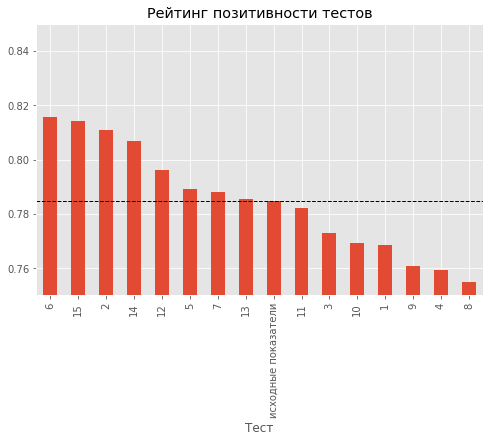

In [9]:
df_2['Положит. результат'].plot(figsize=(8,5), kind='bar', title='Рейтинг позитивности тестов', ylim=[0.75, 0.85])
plt.axhline(df_2.loc['исходные показатели', 'Положит. результат'], color="black", linestyle='dashed', lw=1)
print('*Пунктиром отмечен уровень исходных данных')

### Задание 3

#### Составить рейтинг  тестов  по доходности отдельно для мобильных устройств и для десктопа (только по  сессиям с позитивным результатом).  Определить лучший тест  в каждом сегменте, учитывая рейтинг позитивности. Если у  теста-лидера  по доходности показатель  позитивности  меньше 77% - лучшим тестом принимаем следующий  в рейтинге по  доходности. 

##### Рейтинг для десктопа

In [10]:
df_3 = df[df['Статус'] == 'Положит. результат']
df_3_desk = df_3[df_3['Тип устройства'] == 'desktop']
df_3_desk = df_3_desk.groupby('Тест').agg( {'Профит': 'mean'} ).sort_values('Профит', ascending=False)
df_3_desk['Тест'] = df_3_desk.index
df_3_desk

,Профит,Тест
Тест,,
9,131.636441,9
6,123.098632,6
2,122.662072,2
14,121.161479,14
11,117.971187,11
10,116.102841,10
7,115.672106,7
13,111.445227,13
8,105.898542,8


In [11]:
for i in range(df_3_desk.shape[0]):
    test = df_3_desk.iloc[i, 1]
    profitability = df_3_desk.iloc[i, 0]
    if df_2.loc[test, 'Положит. результат'] > 0.77:
        print(f'Лучший тест в рейтинге для десктопа: {test}')
        print(f'Доходность теста: {profitability}')
        print(f'Показатель позитивности теста: {df_2.loc[test, "Положит. результат"]}')
        break

Лучший тест в рейтинге для десктопа: 6
Доходность теста: 123.09863173216883
Показатель позитивности теста: 0.8158273381294964


##### Рейтинг для мобильных устройств

In [12]:
df_3_mobil = df_3[df_3['Тип устройства'] == 'mobile']
df_3_mobil = df_3_mobil.groupby('Тест').agg( {'Профит': 'mean'} ).sort_values('Профит', ascending=False)
df_3_mobil['Тест'] = df_3_mobil.index
df_3_mobil

,Профит,Тест
Тест,,
6,82.834286,6
7,65.094308,7
2,57.062091,2
15,51.087337,15
13,46.769905,13
14,46.692199,14
12,45.190445,12
10,42.219143,10
5,37.594929,5


In [13]:
for i in range(df_3_mobil.shape[0]):
    test = df_3_mobil.iloc[i, 1]
    profitability = df_3_mobil.iloc[i, 0]
    if df_2.loc[test, 'Положит. результат'] > 0.77:
        print(f'Лучший тест в рейтинге для мобильных устройств: {test}')
        print(f'Доходность теста: {profitability}')
        print(f'Показатель позитивности теста: {df_2.loc[test, "Положит. результат"]}')
        break

Лучший тест в рейтинге для мобильных устройств: 6
Доходность теста: 82.8342857142857
Показатель позитивности теста: 0.8158273381294964


### Задание 4

#### Составить рейтинг тестов по доходности в различных ценовых интервалах (только по  сессиям с позитивным результатом).  Критерий- стоимость заказа.  Один из интервалов - 10000,01 руб -25000,00 руб, прочие интервалы - на усмотрение кандидата. Определить  лучший тест  в каждом сегменте, учитывая рейтинг позитивности. Если у  теста-лидера по доходности показатель  позитивности  меньше 77% - лучшим тестом принимаем следующий в рейтинге по  доходности.

In [14]:
df_4 = df_3
df_4.columns = ['Заказ', 'Стоимость заказа', 'Статус', 'Тип устройства', 'Профит', 'Тест']

In [15]:
interval_width = 40000
bins = np.arange(40000, df_4['Стоимость заказа'].max(), interval_width)
initial_interval = np.array([0.0, 10000.01, 25000])
full_bins = np.hstack((initial_interval, bins, np.array(df_4['Стоимость заказа'].max()+10)))
print('Границы интервалов:')
full_bins

Границы интервалов:


array([     0.  ,  10000.01,  25000.  ,  40000.  ,  80000.  , 120000.  ,
       160000.  , 200000.  , 240000.  , 280000.  , 320000.  , 360000.  ,
       400000.  , 440000.  , 480000.  , 520000.  , 560000.  , 600000.  ,
       640000.  , 680000.  , 701640.  ])

In [16]:
df_4['Интервал'] = pd.cut(df_4['Стоимость заказа'], full_bins, right=False)
df_5 = df_4.groupby(['Интервал', 'Тест']).agg( {'Профит': 'mean'} ).sort_values(['Интервал', 'Профит'], ascending=[True, False])
df_5.to_excel('Mego_travel_excel.xlsx')
print('Рейтинг тестов по доходности в различных ценовых интервалах (записан в файл "Mego_travel_excel.xlsx")')
df_5

Рейтинг тестов по доходности в различных ценовых интервалах (записан в файл "Mego_travel_excel.xlsx")


Профит
Интервал             Тест                          
[0.0, 10000.01)      13                   29.172196
                     15                   28.285405
                     2                    24.494662
                     6                    22.972618
                     11                   20.769764
...                                             ...
[680000.0, 701640.0) 12                         NaN
                     13                         NaN
                     14                         NaN
                     15                         NaN
                     исходные показатели        NaN

[320 rows x 1 columns]

In [17]:
df_6 = df_5
df_6.reset_index(inplace=True)

In [18]:
df_7 = pd.DataFrame(columns=['Интервал','Лучший тест сегмента', 'Доходность', 'Индекс позитивности'])

for item in df_6['Интервал'].unique():
    df_segment = df_6[df_6['Интервал'] == item].sort_values('Профит', ascending=False)
    for i in range(df_segment.shape[0]):
        interval = df_segment.iloc[i, 0]
        test = df_segment.iloc[i, 1]
        profitability = df_segment.iloc[i, 2]
        positive_index = df_2.loc[test, "Положит. результат"]
        if df_2.loc[test, 'Положит. результат'] > 0.77:
            row = pd.DataFrame( {'Интервал': interval, 'Лучший тест сегмента': test, 
                                       'Доходность': profitability, 'Индекс позитивности': positive_index}, index=[0] )
            df_7 = df_7.append(row, ignore_index=True)
            break

In [19]:
print('Лучший тест в сегменте, учитывая рейтинг позитивности')
df_7

Лучший тест в сегменте, учитывая рейтинг позитивности


,Интервал,Лучший тест сегмента,Доходность,Индекс позитивности
0,"[0.0, 10000.01)",13,29.172196,0.785482
1,"[10000.01, 25000.0)",13,127.023204,0.785482
2,"[25000.0, 40000.0)",6,258.898101,0.815827
3,"[40000.0, 80000.0)",11,626.093333,0.782303
4,"[80000.0, 120000.0)",2,1212.410000,0.810895
5,"[120000.0, 160000.0)",12,8205.840000,0.796036
6,"[160000.0, 200000.0)",6,0.000000,0.815827
7,"[200000.0, 240000.0)",13,2639.000000,0.785482
8,"[240000.0, 280000.0)",2,NaN,0.810895
9,"[280000.0, 320000.0)",14,0.000000,0.806682
